In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv('1.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn']), drop_first=True)

In [25]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1384  165]
 [ 242  319]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110


Accuracy Score:
0.8071090047393364


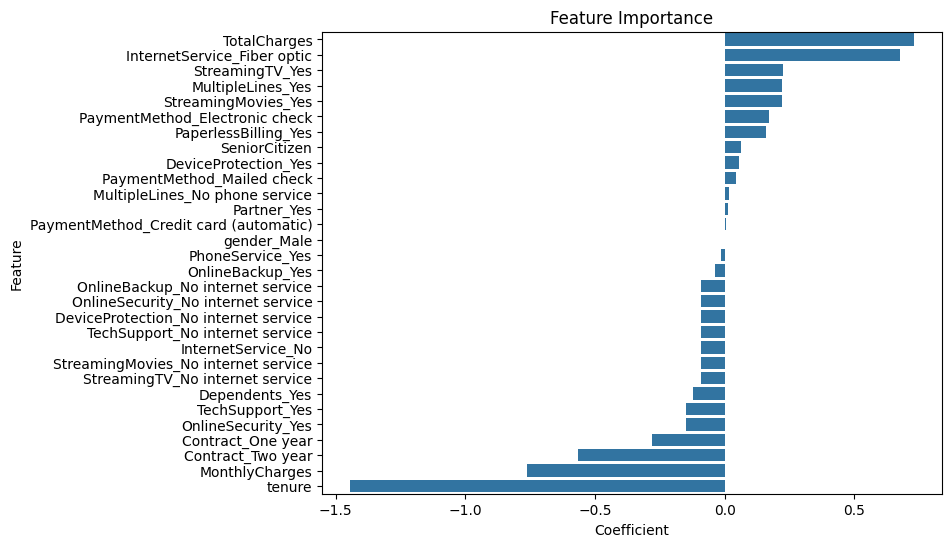

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients['Feature'])
plt.title('Feature Importance')
plt.show()